In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date

%matplotlib inline

In [2]:
student_mat_df = pd.read_csv("student-mat.csv", sep=';')
student_por_df = pd.read_csv("student-por.csv", sep=';')

In [3]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# 1. Fecha de ejecución del script

today = date.today()
print(today)

2022-10-06


In [6]:
# 2. Crear un DataFrame para cada escuela, y quitar valores nulos

GP_mat = student_mat_df[student_mat_df.school == 'GP'].dropna(axis=0)
MS_mat = student_mat_df[student_mat_df.school == 'MS'].dropna(axis=0)
GP_por = student_por_df[student_por_df.school == 'GP'].dropna(axis=0)
MS_por = student_por_df[student_por_df.school == 'MS'].dropna(axis=0)

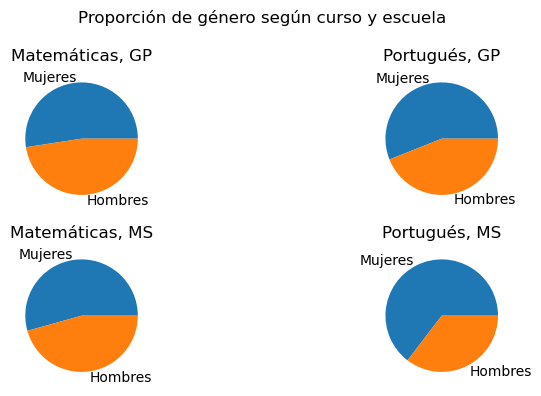

In [7]:
# 3. Gráfico de hombres y mujeres

fig1, axs1 = plt.subplots(2, 2, figsize=(9, 4))


(GP_mat["sex"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='pie', ax=axs1[0, 0], ylabel='', 
                    labels=['Mujeres', 'Hombres'], title='Matemáticas, GP'))
        
(GP_por["sex"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='pie', ax=axs1[0, 1], ylabel='', 
                    labels=['Mujeres', 'Hombres'], title='Portugués, GP'))
        
(MS_mat["sex"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='pie', ax=axs1[1, 0], ylabel='', 
                    labels=['Mujeres', 'Hombres'], title='Matemáticas, MS'))
        
(MS_por["sex"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='pie', ax=axs1[1, 1], ylabel='', 
                    labels=['Mujeres', 'Hombres'], title='Portugués, MS'))
        

fig1.suptitle("Proporción de género según curso y escuela")

fig1.tight_layout()

plt.show()

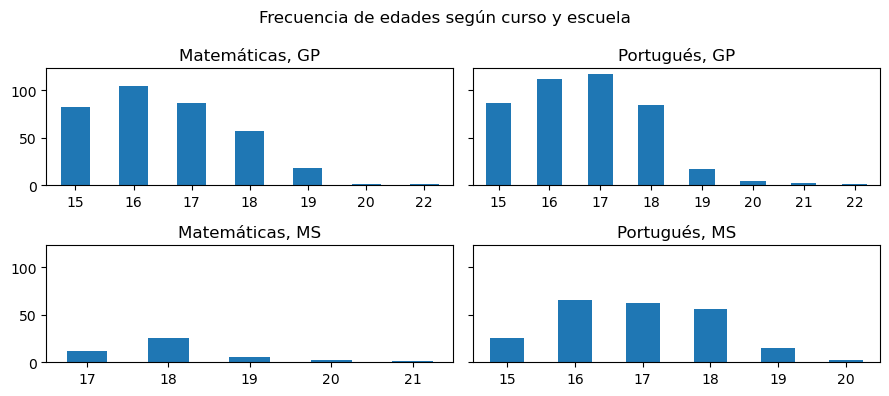

In [8]:
# 4. Gráfico de personas con misma edad

fig2, axs2 = plt.subplots(2, 2, figsize=(9, 4), sharey=True)

(GP_mat["age"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='bar', ax=axs2[0, 0], title='Matemáticas, GP', rot=0))

(GP_por["age"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='bar', ax=axs2[0, 1], title='Portugués, GP', rot=0))

(MS_mat["age"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='bar', ax=axs2[1, 0], title='Matemáticas, MS', rot=0))

(MS_por["age"].value_counts()
              .sort_index(ascending=True)
              .plot(kind='bar', ax=axs2[1, 1], title='Portugués, MS', rot=0))


fig2.suptitle("Frecuencia de edades según curso y escuela")

fig2.tight_layout()

plt.show()

In [9]:
# 5. Promedio de edades según curso y escuela

GP_mat_avg_age = GP_mat.age.mean().round(2)
GP_por_avg_age = GP_por.age.mean().round(2)
MS_mat_avg_age = MS_mat.age.mean().round(2)
MS_por_avg_age = MS_por.age.mean().round(2)

print(f"Promedio en matemáticas, GP: {GP_mat_avg_age}")
print(f"Promedio en portugués, GP: {GP_por_avg_age}")
print(f"Promedio en matemáticas, MS: {MS_mat_avg_age}")
print(f"Promedio en portugués, MS: {MS_por_avg_age}")

Promedio en matemáticas, GP: 16.52
Promedio en portugués, GP: 16.67
Promedio en matemáticas, MS: 18.02
Promedio en portugués, MS: 16.89


In [10]:
# 6.1. Promedio de notas según curso y escuela

GP_mat_avg_grade = GP_mat[["G1", "G2", "G3"]].mean().round(2)
GP_por_avg_grade = GP_por[["G1", "G2", "G3"]].mean().round(2)
MS_mat_avg_grade = MS_mat[["G1", "G2", "G3"]].mean().round(2)
MS_por_avg_grade = MS_por[["G1", "G2", "G3"]].mean().round(2)

print(f"Promedio en matemáticas, GP:\n{GP_mat_avg_grade.to_string()}\n")
print(f"Promedio en portugués, GP: \n{GP_por_avg_grade.to_string()}\n")
print(f"Promedio en matemáticas, MS: \n{MS_mat_avg_grade.to_string()}\n")
print(f"Promedio en portugués, MS: \n{MS_por_avg_grade.to_string()}\n")

Promedio en matemáticas, GP:
G1    10.94
G2    10.78
G3    10.49

Promedio en portugués, GP: 
G1    11.99
G2    12.14
G3    12.58

Promedio en matemáticas, MS: 
G1    10.67
G2    10.20
G3     9.85

Promedio en portugués, MS: 
G1    10.30
G2    10.50
G3    10.65



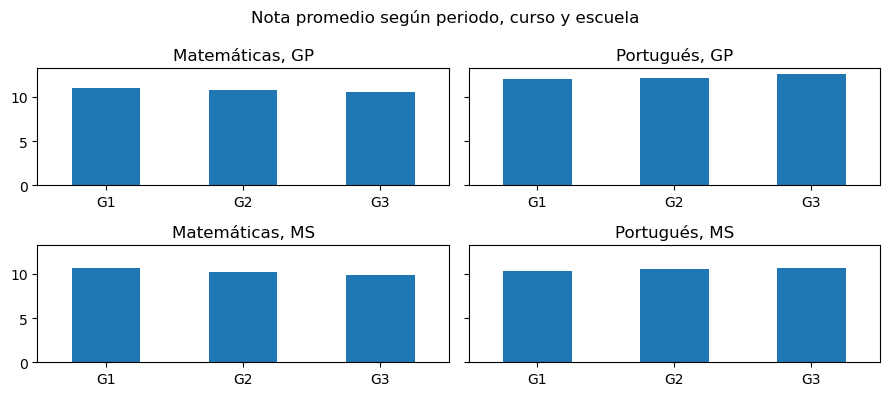

In [11]:
# 6.2. Gráfico de promedio de notas según curso y escuela

fig3, axs3 = plt.subplots(2, 2, figsize=(9, 4), sharey=True)

GP_mat_avg_grade.plot(kind='bar', ax=axs3[0, 0], title='Matemáticas, GP', rot=0)
GP_por_avg_grade.plot(kind='bar', ax=axs3[0, 1], title='Portugués, GP', rot=0)
MS_mat_avg_grade.plot(kind='bar', ax=axs3[1, 0], title='Matemáticas, MS', rot=0)
MS_por_avg_grade.plot(kind='bar', ax=axs3[1, 1], title='Portugués, MS', rot=0)

fig3.suptitle("Nota promedio según periodo, curso y escuela")

fig3.tight_layout()

plt.show()

In [12]:
# 7.1. Hallar máximo valor de ausencias

GP_mat_total = GP_mat.absences.max()
GP_por_total = GP_por.absences.max()
MS_mat_total = MS_mat.absences.max()
MS_por_total = MS_por.absences.max()

In [13]:
# 7.2. Hallar los alumnos que fueron aprobados

# Notar que 1-df.absences/df_total es la proporción de días que el estudiante asistió respecto al total

GP_mat["Approved"] = np.where((1 - GP_mat.absences/GP_mat_total < 0.8) | (GP_mat.G3 < 10), 0, 1)
GP_por["Approved"] = np.where((1 - GP_por.absences/GP_por_total < 0.8) | (GP_por.G3 < 10), 0, 1)
MS_mat["Approved"] = np.where((1 - MS_mat.absences/MS_mat_total < 0.8) | (MS_mat.G3 < 10), 0, 1)
MS_por["Approved"] = np.where((1 - MS_por.absences/MS_por_total < 0.8) | (MS_por.G3 < 10), 0, 1)

In [14]:
# 7.3. Asignar números a la columna extra

# Crearemos una función que opere en cada fila para que asigne el resultado a la nueva columna extra

def fill_extra(row):
    if (row["Approved"] == 1) and (row["G3"] >= 10 and row["G3"] <= 15):
        return 1
    elif (row["Approved"] == 1) and (row["G3"] > 15):
        return 0
    else:
        return pd.NA

GP_mat["Extra"] = GP_mat.apply(fill_extra, axis=1)
GP_por["Extra"] = GP_por.apply(fill_extra, axis=1)
MS_mat["Extra"] = MS_mat.apply(fill_extra, axis=1)
MS_por["Extra"] = MS_por.apply(fill_extra, axis=1)


# Comentario. Existe una forma de asignar valores a la columna extra de forma vectorizada,
# un poco más eficiente que .apply():
# GP_mat["Extra"] = pd.NA
# mask = (GP_mat["Approved"] == 1) & ((GP_mat["G3"] >= 10) & (GP_mat["G3"] <= 15))
# GP_mat.loc[mask, "Extra"] = 1
# mask = (GP_mat["Approved"] == 1) & (GP_mat["G3"] > 15)
# GP_mat.loc[mask, "Extra"] = 0

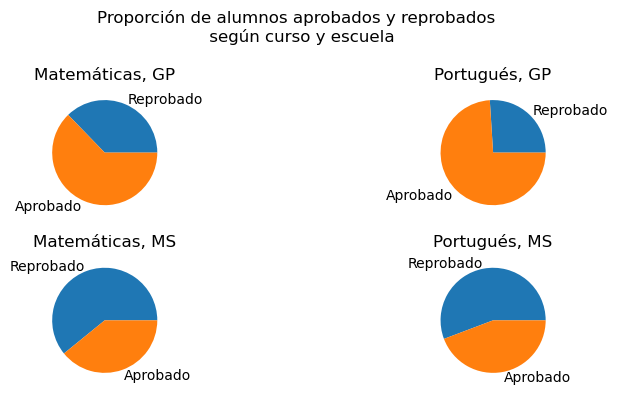

In [15]:
# 7.4. Gráfico de alumnos aprobados

fig4, axs4 = plt.subplots(2, 2, figsize=(9, 4))

(GP_mat["Approved"].value_counts()
                   .sort_index(ascending=True)
                   .plot(kind='pie', ax=axs4[0, 0], ylabel='',
                         labels=['Reprobado', 'Aprobado'], title='Matemáticas, GP'))
        
(GP_por["Approved"].value_counts()
                   .sort_index(ascending=True)
                   .plot(kind='pie', ax=axs4[0, 1], ylabel='',
                         labels=['Reprobado', 'Aprobado'], title='Portugués, GP'))
        
(MS_mat["Approved"].value_counts()
                   .sort_index(ascending=True)
                   .plot(kind='pie', ax=axs4[1, 0], ylabel='',
                         labels=['Reprobado', 'Aprobado'], title='Matemáticas, MS'))
        
(MS_por["Approved"].value_counts()
                   .sort_index(ascending=True)
                   .plot(kind='pie', ax=axs4[1, 1], ylabel='',
                         labels=['Reprobado', 'Aprobado'], title='Portugués, MS'))
        

fig4.suptitle("Proporción de alumnos aprobados y reprobados \n según curso y escuela")

fig4.tight_layout()

plt.show()

In [16]:
# 8. Generar archivos CSV

GP_mat.to_csv(f"GP_mat{today}.csv", index=False)
GP_por.to_csv(f"GP_por{today}.csv", index=False)
MS_mat.to_csv(f"MS_mat{today}.csv", index=False)
MS_por.to_csv(f"MS_por{today}.csv", index=False)

In [17]:
# 9. Generar archivo PDF con gráficos

with PdfPages("graficos.pdf") as pdf:
    pdf.savefig(fig1)
    pdf.savefig(fig2)
    pdf.savefig(fig3)
    pdf.savefig(fig4)